In [1]:
# once i have wholegenome_offset.trees
import pandas as pd
import tskit
import allel
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tsinfer
import pyslim
import os
from collections import defaultdict

In [ ]:
####

In [137]:
va = pd.read_csv('results_va10gen.csv')
vpheno = pd.read_csv('results_vpheno10gen.csv')
mfitness = pd.read_csv('results_mfitness10gen.csv', index_col=[0])
vfitness = pd.read_csv('results_vfitness10gen.csv')
pop_size = pd.read_csv('results_pop_size10gen.csv')

In [138]:
## mean fitness

In [139]:
mfitness['optima'] = mfitness.index.str.split('/').str[-1]
mfitness['sel'] = mfitness.index.str.split('/').str[-2]
mfitness['freq'] = mfitness.index.str.split('/').str[-3].str.split('_').str[1]
mfitness['poly'] = mfitness.index.str.split('/').str[-3].str.split('_').str[2]
mfitness['beta'] = mfitness.index.str.split('/').str[-3].str.split('_').str[3]


In [142]:
## for mean fitness is it is nan is beacuase the pop died so the mean fitness should be 0
mfitness = mfitness.fillna(0)


In [143]:
mfitness= mfitness.replace({'optima0': 'ex', 'optima1': 'me', 'optima2': 'int', 'optima3': 'me', 'optima4': 'ex'})

In [144]:
mfitness['sel_freq'] = mfitness['sel'] + mfitness['freq']
mfitness['poly_beta'] = mfitness['poly'] + mfitness['beta']
mfitness['freq-optima'] = mfitness['freq'] + '_' +  mfitness['optima']

In [157]:
mfitness_0gen= mfitness[['optima','sel','freq','poly','beta', 'sel_freq', 'poly_beta' ,'freq-optima', '0']].copy()

mfitness_0gen = mfitness_0gen.reset_index(drop=True)

mfitness_0gen = mfitness_0gen.rename(columns={1: 'mfitness_1gen'})

In [158]:
#colors
custom_categories = ['lowfreq', 'mediumfreq', 'highfreq']
custom_colors = sns.color_palette("Greens", n_colors=len(custom_categories))

# Create a custom color dictionary
custom_color_dict = dict(zip(custom_categories, custom_colors))

In [159]:
custom_colors

[(0.7792233756247597, 0.9132333717800846, 0.7518031526336024),
 (0.45176470588235296, 0.7670895809304115, 0.4612072279892349),
 (0.1340253748558247, 0.5423298731257208, 0.26828143021914647)]

In [160]:
colors_full = []

for color in custom_colors:
    colors_full.extend([color] * 3)

In [161]:
colors_full

[(0.7792233756247597, 0.9132333717800846, 0.7518031526336024),
 (0.7792233756247597, 0.9132333717800846, 0.7518031526336024),
 (0.7792233756247597, 0.9132333717800846, 0.7518031526336024),
 (0.45176470588235296, 0.7670895809304115, 0.4612072279892349),
 (0.45176470588235296, 0.7670895809304115, 0.4612072279892349),
 (0.45176470588235296, 0.7670895809304115, 0.4612072279892349),
 (0.1340253748558247, 0.5423298731257208, 0.26828143021914647),
 (0.1340253748558247, 0.5423298731257208, 0.26828143021914647),
 (0.1340253748558247, 0.5423298731257208, 0.26828143021914647)]

In [162]:
hue_order = ['lowfreq_optima0', 'lowfreq_optima1', 'lowfreq_optima2',
       'lowfreq_optima3', 'lowfreq_optima4', 'mediumfreq_optima0', 'mediumfreq_optima1',
       'mediumfreq_optima2', 'mediumfreq_optima3', 'mediumfreq_optima4','highfreq_optima0',
       'highfreq_optima1', 'highfreq_optima2', 'highfreq_optima3',
       'highfreq_optima4']

hue_order = ['lowfreq_int', 'lowfreq_me', 'lowfreq_ex', 'mediumfreq_int', 'mediumfreq_me',
       'mediumfreq_ex', 'highfreq_int',
       'highfreq_me', 'highfreq_ex',]

In [163]:
custom_color_dict = dict(zip(hue_order, colors_full))

In [164]:
custom_color_dict

{'lowfreq_int': (0.7792233756247597, 0.9132333717800846, 0.7518031526336024),
 'lowfreq_me': (0.7792233756247597, 0.9132333717800846, 0.7518031526336024),
 'lowfreq_ex': (0.7792233756247597, 0.9132333717800846, 0.7518031526336024),
 'mediumfreq_int': (0.45176470588235296,
  0.7670895809304115,
  0.4612072279892349),
 'mediumfreq_me': (0.45176470588235296,
  0.7670895809304115,
  0.4612072279892349),
 'mediumfreq_ex': (0.45176470588235296,
  0.7670895809304115,
  0.4612072279892349),
 'highfreq_int': (0.1340253748558247, 0.5423298731257208, 0.26828143021914647),
 'highfreq_me': (0.1340253748558247, 0.5423298731257208, 0.26828143021914647),
 'highfreq_ex': (0.1340253748558247, 0.5423298731257208, 0.26828143021914647)}

In [165]:
x_order = ['lowsel', 'moderatesel', 'strongsel']


In [166]:
hue_order

['lowfreq_int',
 'lowfreq_me',
 'lowfreq_ex',
 'mediumfreq_int',
 'mediumfreq_me',
 'mediumfreq_ex',
 'highfreq_int',
 'highfreq_me',
 'highfreq_ex']

In [167]:
mfitness_0gen

optima          sel      freq        poly      beta             sel_freq  \
0        ex       lowsel   lowfreq  twentypoly   lowbeta        lowsellowfreq   
1        ex       lowsel   lowfreq  twentypoly   lowbeta        lowsellowfreq   
2        ex       lowsel   lowfreq  twentypoly   lowbeta        lowsellowfreq   
3        ex       lowsel   lowfreq  twentypoly   lowbeta        lowsellowfreq   
4        ex       lowsel   lowfreq  twentypoly   lowbeta        lowsellowfreq   
...     ...          ...       ...         ...       ...                  ...   
1795     me  moderatesel  highfreq     monogen  highbeta  moderateselhighfreq   
1796     me  moderatesel  highfreq     monogen  highbeta  moderateselhighfreq   
1797     me  moderatesel  highfreq     monogen  highbeta  moderateselhighfreq   
1798     me  moderatesel  highfreq     monogen  highbeta  moderateselhighfreq   
1799     me  moderatesel  highfreq     monogen  highbeta  moderateselhighfreq   

              poly_beta  freq-optima         0  
0     twentypolylowbeta   lowfreq_ex  0.104664  
1     twentypolylowbeta   lowfreq_ex  0.104524  
2     twentypolylowbeta   lowfreq_ex  0.103996  
3     twentypolylowbeta   lowfreq_ex  0.103509  
4     twentypolylowbeta   lowfreq_ex  0.107225  
...                 ...          ...       ...  
1795    monogenhighbeta  highfreq_me  0.350070  
1796    monogenhighbeta  highfreq_me  0.353480  
1797    monogenhighbeta  highfreq_me  0.353144  
1798    monogenhighbeta  highfreq_me  0.351425  
1799    monogenhighbeta  highfreq_me  0.341856  

[1800 rows x 9 columns]

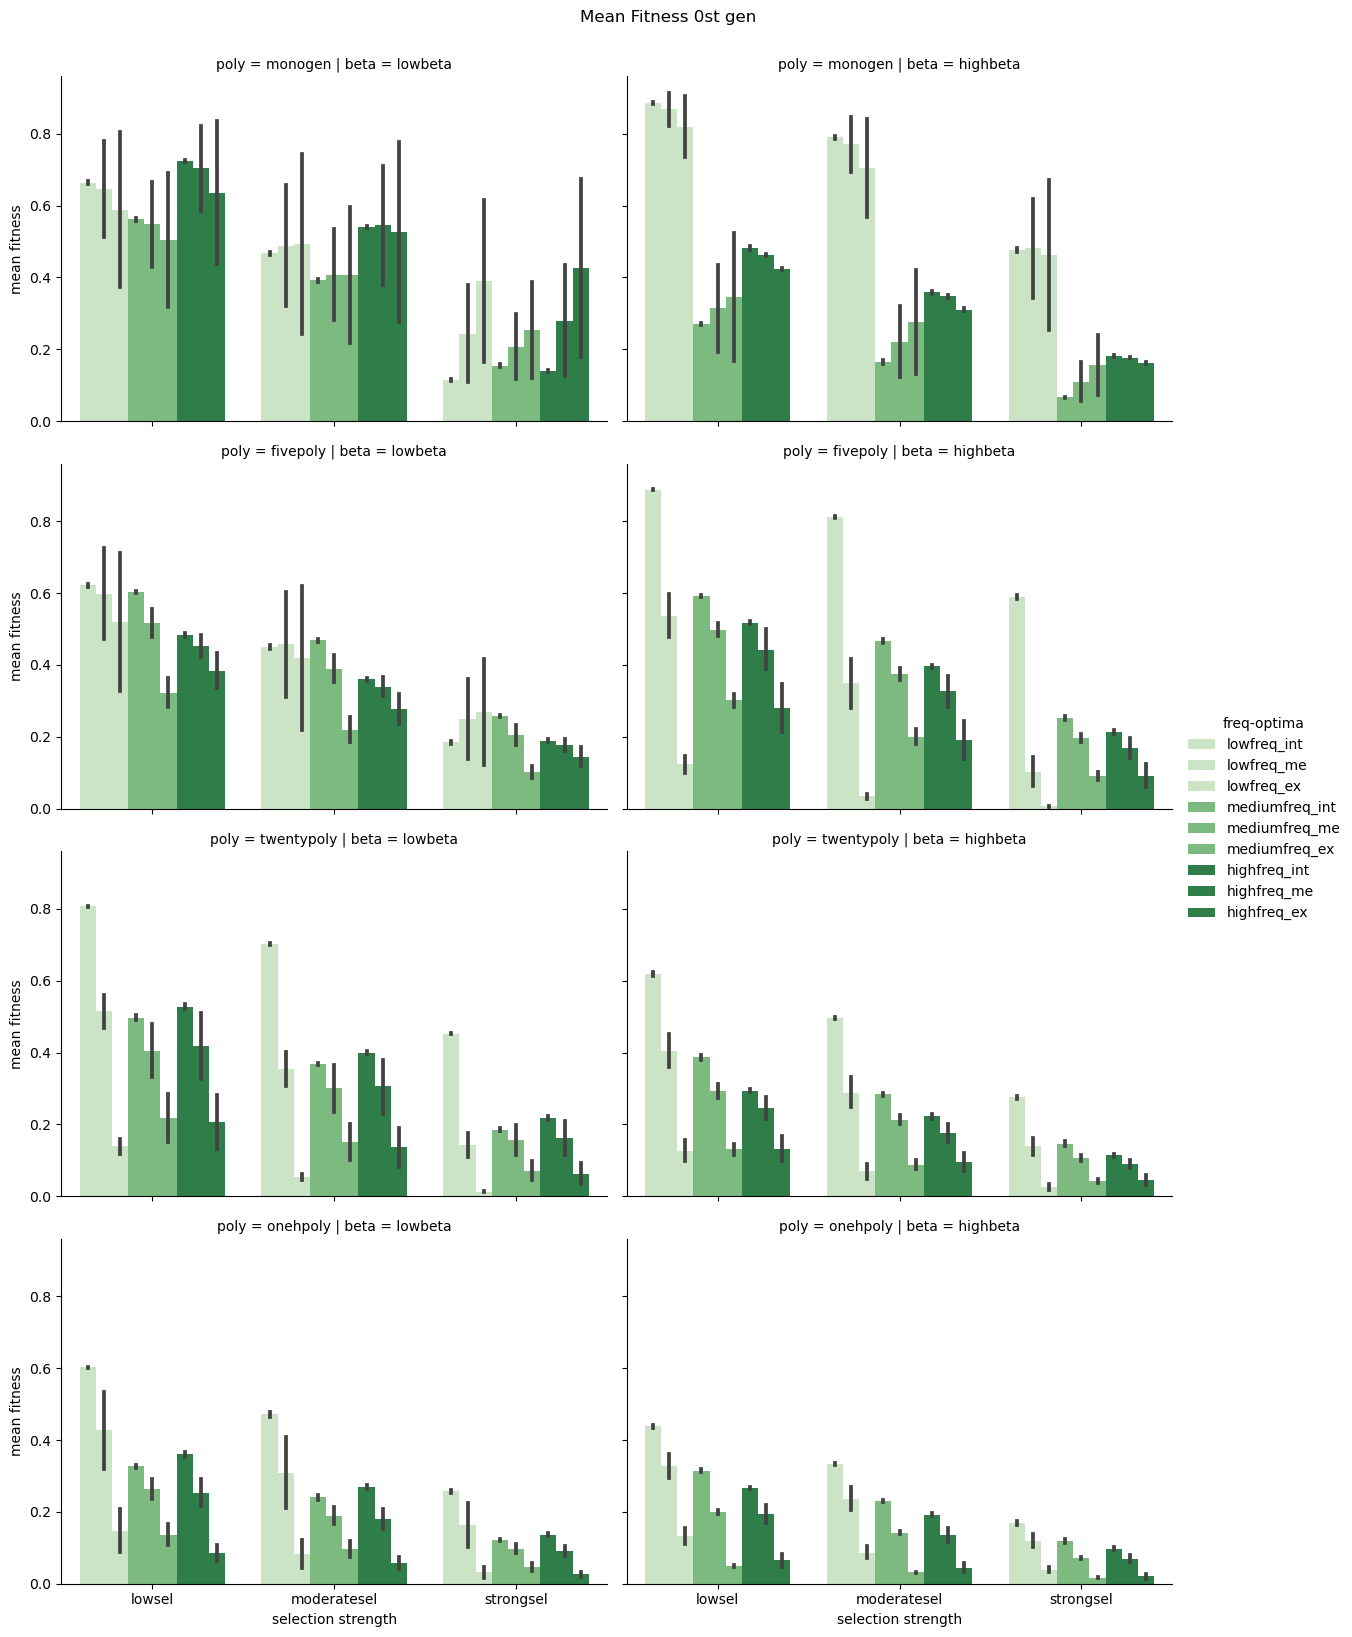

In [168]:
# Create a facet grid with two additional categorical variables
g = sns.catplot(data=mfitness_0gen, x='sel', y='0', hue='freq-optima', col='beta', row='poly',
                row_order=['monogen', 'fivepoly', 'twentypoly', 'onehpoly'], 
                kind="bar", height=4, aspect=1.5,
                palette=custom_color_dict,
                hue_order=hue_order,
                order=x_order)
g.fig.suptitle('Mean Fitness 0st gen', y=1.02)
g.set_axis_labels('selection strength', 'mean fitness')

# Show the plot
plt.show()

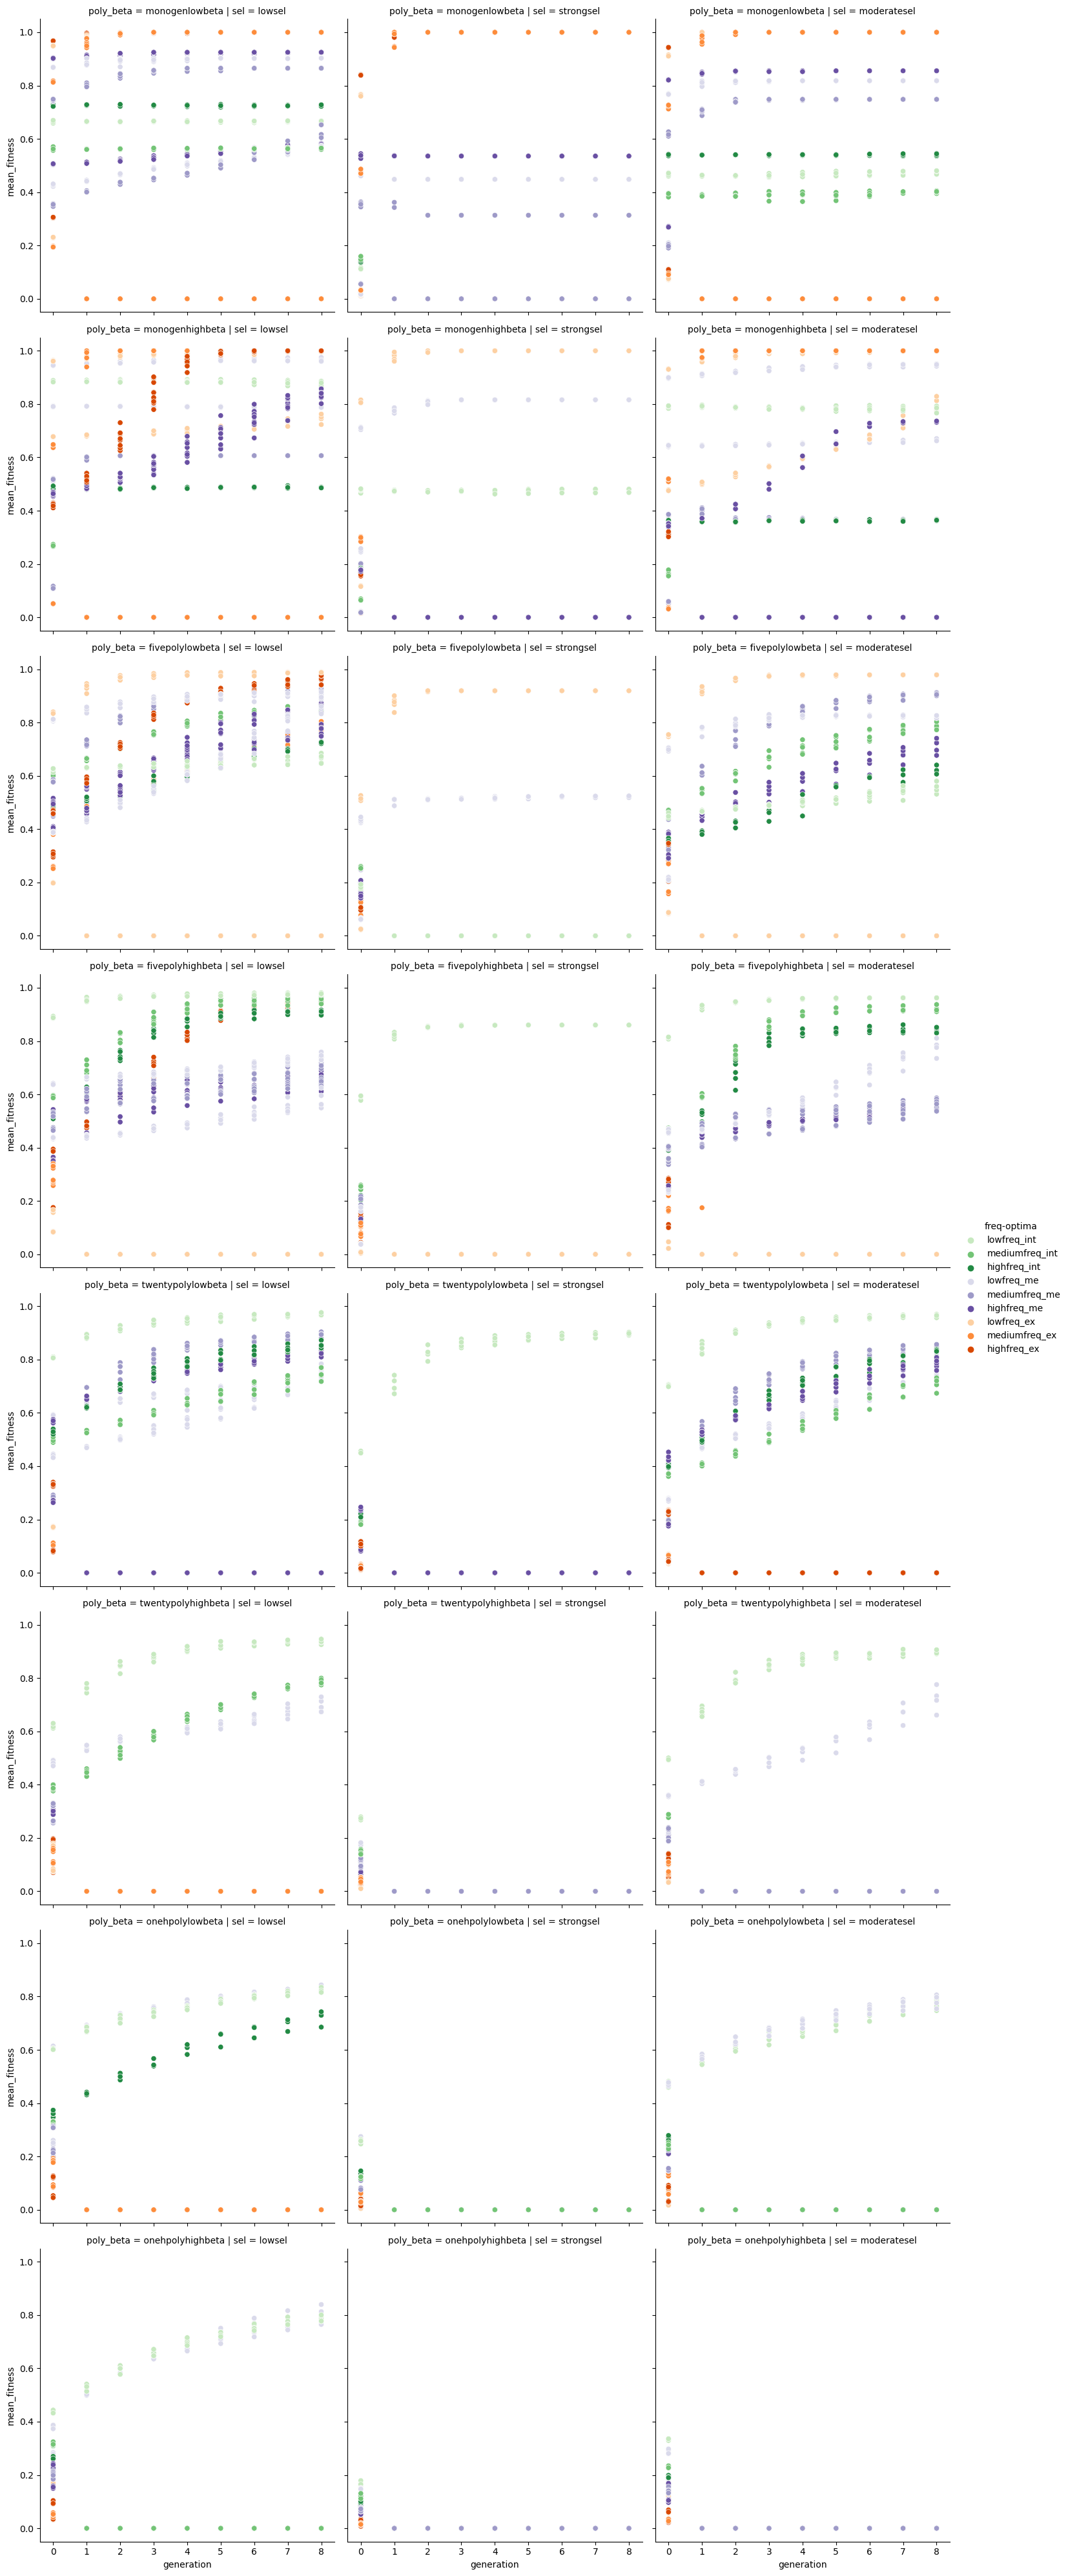

In [179]:
selected_columns = ['optima','sel','freq','poly','beta','sel_freq','poly_beta','freq-optima']
melted_mfitness = mfitness.melt(selected_columns, var_name='generation', value_name='mean_fitness')

hue_order = ['lowfreq_int', 'mediumfreq_int', 'highfreq_int',
             'lowfreq_me', 'mediumfreq_me', 'highfreq_me',
       'lowfreq_ex', 'mediumfreq_ex', 'highfreq_ex',]

melted_mfitness['freq-optima'] = melted_mfitness['freq'] + '_' +  melted_mfitness['optima']

row_order=['monogenlowbeta', 'monogenhighbeta', 'fivepolylowbeta', 'fivepolyhighbeta', 'twentypolylowbeta', 'twentypolyhighbeta', 'onehpolylowbeta', 'onehpolyhighbeta']

greens = sns.color_palette("Greens", n_colors=3)
purples = sns.color_palette("Purples", n_colors=3)
oranges = sns.color_palette("Oranges", n_colors=3)

custom_colors2 = greens + purples + oranges

custom_color_dict2 = dict(zip(hue_order, custom_colors2))

sns.relplot(data=melted_mfitness, x="generation", y="mean_fitness", hue="freq-optima", col="sel", row="poly_beta",
                row_order = row_order,
                palette=custom_color_dict2,
                hue_order=hue_order
           )


In [180]:
order_poly_beta = ['monogenhighbeta','monogenlowbeta',
 'fivepolyhighbeta', 'fivepolylowbeta',
 'twentypolyhighbeta', 'twentypolylowbeta',
 'onehpolyhighbeta', 'onehpolylowbeta']

In [181]:
order_sel_freq = ['lowsellowfreq', 'lowselmediumfreq','lowselhighfreq', 
       'moderatesellowfreq', 'moderateselmediumfreq','moderateselhighfreq',
        'strongsellowfreq', 'strongselmediumfreq', 'strongselhighfreq',]

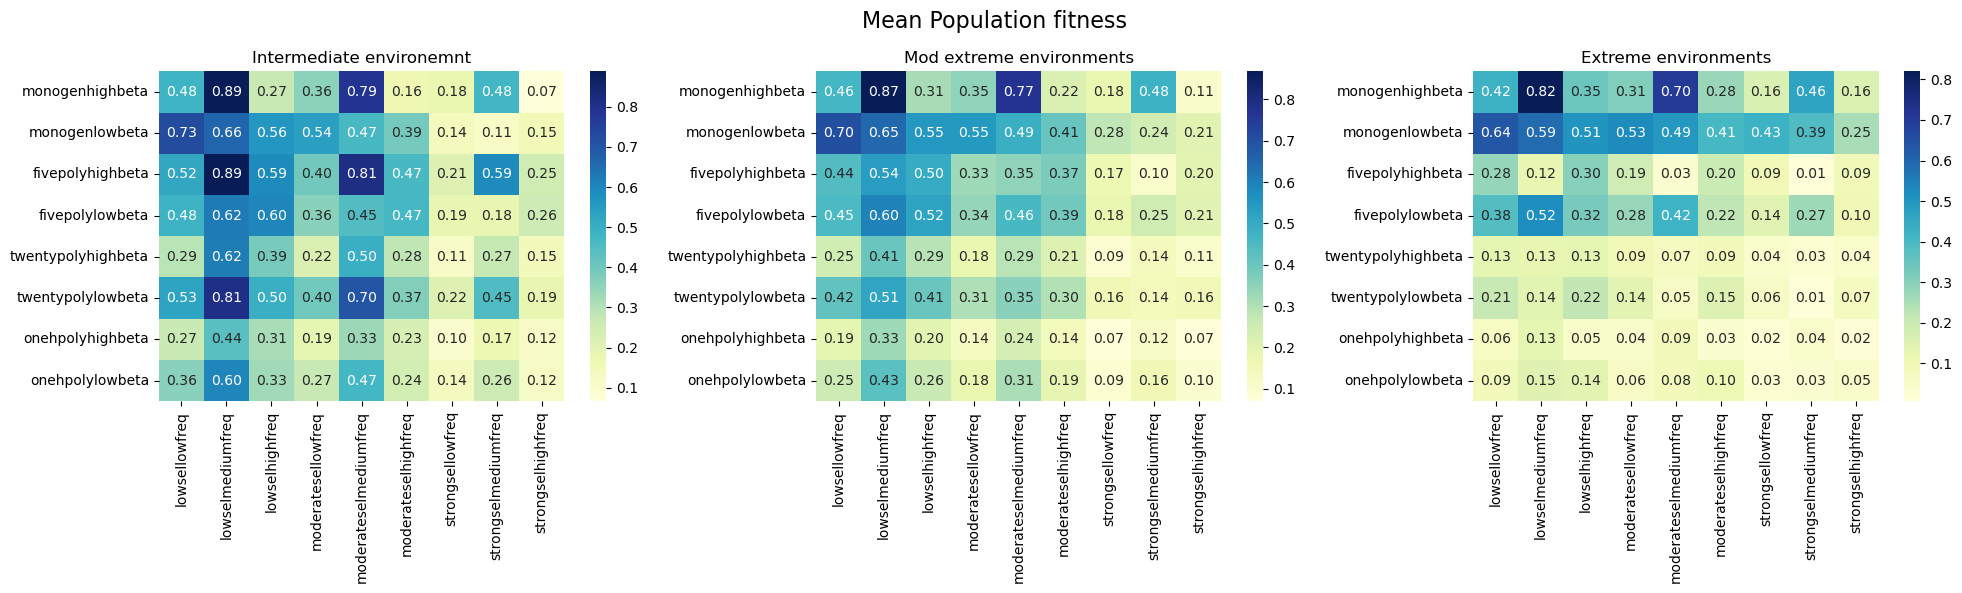

In [184]:
mfitness_0gen= mfitness[['optima','sel','freq','poly','beta', '0', 'sel_freq', 'poly_beta']].copy()

mfitness_0gen = mfitness_0gen.reset_index(drop=True)

filter1 = mfitness_0gen[mfitness_0gen['optima'] == 'int']
filter2 = mfitness_0gen[mfitness_0gen['optima'] == 'me']
filter3 = mfitness_0gen[mfitness_0gen['optima'] == 'ex']

# Create a 1x3 grid of subplots for heatmaps
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Plot each heatmap from the filtered DataFrames in its respective subplot
filter1 = filter1.pivot_table(index='poly_beta', columns=['sel_freq'], values='0')
filter1.columns = order_sel_freq
filter1 = filter1.loc[order_poly_beta]
sns.heatmap(filter1,annot=True, cmap='YlGnBu', fmt=".2f", ax=axes[0])

axes[0].set_title('Intermediate environemnt')
axes[0].set_ylabel('')

filter2 = filter2.pivot_table(index='poly_beta', columns=['sel_freq'], values='0')
filter2 = filter2.loc[order_poly_beta]
filter2.columns = order_sel_freq
sns.heatmap(filter2,annot=True, cmap='YlGnBu', fmt=".2f", ax=axes[1])
axes[1].set_title('Mod extreme environments')
axes[1].set_ylabel('')

filter3 = filter3.pivot_table(index='poly_beta', columns=['sel_freq'], values='0')
filter3 = filter3.loc[order_poly_beta]

filter3.columns = order_sel_freq
sns.heatmap(filter3,annot=True, cmap='YlGnBu', fmt=".2f", ax=axes[2])
axes[2].set_title('Extreme environments')
axes[2].set_ylabel('')

fig.suptitle('Mean Population fitness', fontsize=16)


# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [185]:
def create_pivot_rearrage(filter_df, col_num):
    filter_df = filter_df.pivot_table(index='poly_beta', columns=['sel_freq'], values=col_num)
    filter_df.columns = order_sel_freq
    filter_df = filter_df.loc[order_poly_beta]
    return filter_df

In [186]:
mfitness

0         1  \
/home/tbellagio/scratch/slim_grenenet4gen/slim_...  0.104664  0.000000   
/home/tbellagio/scratch/slim_grenenet4gen/slim_...  0.104524  0.000000   
/home/tbellagio/scratch/slim_grenenet4gen/slim_...  0.103996  0.000000   
/home/tbellagio/scratch/slim_grenenet4gen/slim_...  0.103509  0.000000   
/home/tbellagio/scratch/slim_grenenet4gen/slim_...  0.107225  0.000000   
...                                                      ...       ...   
/home/tbellagio/scratch/slim_grenenet4gen/slim_...  0.350070  0.000000   
/home/tbellagio/scratch/slim_grenenet4gen/slim_...  0.353480  0.000000   
/home/tbellagio/scratch/slim_grenenet4gen/slim_...  0.353144  0.000000   
/home/tbellagio/scratch/slim_grenenet4gen/slim_...  0.351425  0.371425   
/home/tbellagio/scratch/slim_grenenet4gen/slim_...  0.341856  0.000000   

                                                           2         3  \
/home/tbellagio/scratch/slim_grenenet4gen/slim_...  0.000000  0.000000   
/home/tbellagio/scratch/slim_grenenet4gen/slim_...  0.000000  0.000000   
/home/tbellagio/scratch/slim_grenenet4gen/slim_...  0.000000  0.000000   
/home/tbellagio/scratch/slim_grenenet4gen/slim_...  0.000000  0.000000   
/home/tbellagio/scratch/slim_grenenet4gen/slim_...  0.000000  0.000000   
...                                                      ...       ...   
/home/tbellagio/scratch/slim_grenenet4gen/slim_...  0.000000  0.000000   
/home/tbellagio/scratch/slim_grenenet4gen/slim_...  0.000000  0.000000   
/home/tbellagio/scratch/slim_grenenet4gen/slim_...  0.000000  0.000000   
/home/tbellagio/scratch/slim_grenenet4gen/slim_...  0.424288  0.501402   
/home/tbellagio/scratch/slim_grenenet4gen/slim_...  0.000000  0.000000   

                                                           4         5  \
/home/tbellagio/scratch/slim_grenenet4gen/slim_...  0.000000  0.000000   
/home/tbellagio/scratch/slim_grenenet4gen/slim_...  0.000000  0.000000   
/home/tbellagio/scratch/slim_grenenet4gen/slim_...  0.000000  0.000000   
/home/tbellagio/scratch/slim_grenenet4gen/slim_...  0.000000  0.000000   
/home/tbellagio/scratch/slim_grenenet4gen/slim_...  0.000000  0.000000   
...                                                      ...       ...   
/home/tbellagio/scratch/slim_grenenet4gen/slim_...  0.000000  0.000000   
/home/tbellagio/scratch/slim_grenenet4gen/slim_...  0.000000  0.000000   
/home/tbellagio/scratch/slim_grenenet4gen/slim_...  0.000000  0.000000   
/home/tbellagio/scratch/slim_grenenet4gen/slim_...  0.605262  0.696668   
/home/tbellagio/scratch/slim_grenenet4gen/slim_...  0.000000  0.000000   

                                                           6         7  \
/home/tbellagio/scratch/slim_grenenet4gen/slim_...  0.000000  0.000000   
/home/tbellagio/scratch/slim_grenenet4gen/slim_...  0.000000  0.000000   
/home/tbellagio/scratch/slim_grenenet4gen/slim_...  0.000000  0.000000   
/home/tbellagio/scratch/slim_grenenet4gen/slim_...  0.000000  0.000000   
/home/tbellagio/scratch/slim_grenenet4gen/slim_...  0.000000  0.000000   
...                                                      ...       ...   
/home/tbellagio/scratch/slim_grenenet4gen/slim_...  0.000000  0.000000   
/home/tbellagio/scratch/slim_grenenet4gen/slim_...  0.000000  0.000000   
/home/tbellagio/scratch/slim_grenenet4gen/slim_...  0.000000  0.000000   
/home/tbellagio/scratch/slim_grenenet4gen/slim_...  0.727962  0.734312   
/home/tbellagio/scratch/slim_grenenet4gen/slim_...  0.000000  0.000000   

                                                           8 optima  \
/home/tbellagio/scratch/slim_grenenet4gen/slim_...  0.000000     ex   
/home/tbellagio/scratch/slim_grenenet4gen/slim_...  0.000000     ex   
/home/tbellagio/scratch/slim_grenenet4gen/slim_...  0.000000     ex   
/home/tbellagio/scratch/slim_grenenet4gen/slim_...  0.000000     ex   
/home/tbellagio/scratch/slim_grenenet4gen/slim_...  0.000000     ex   
...                                                      ...    ...   
/home/

In [187]:
mfitness = mfitness.reset_index(drop=True)

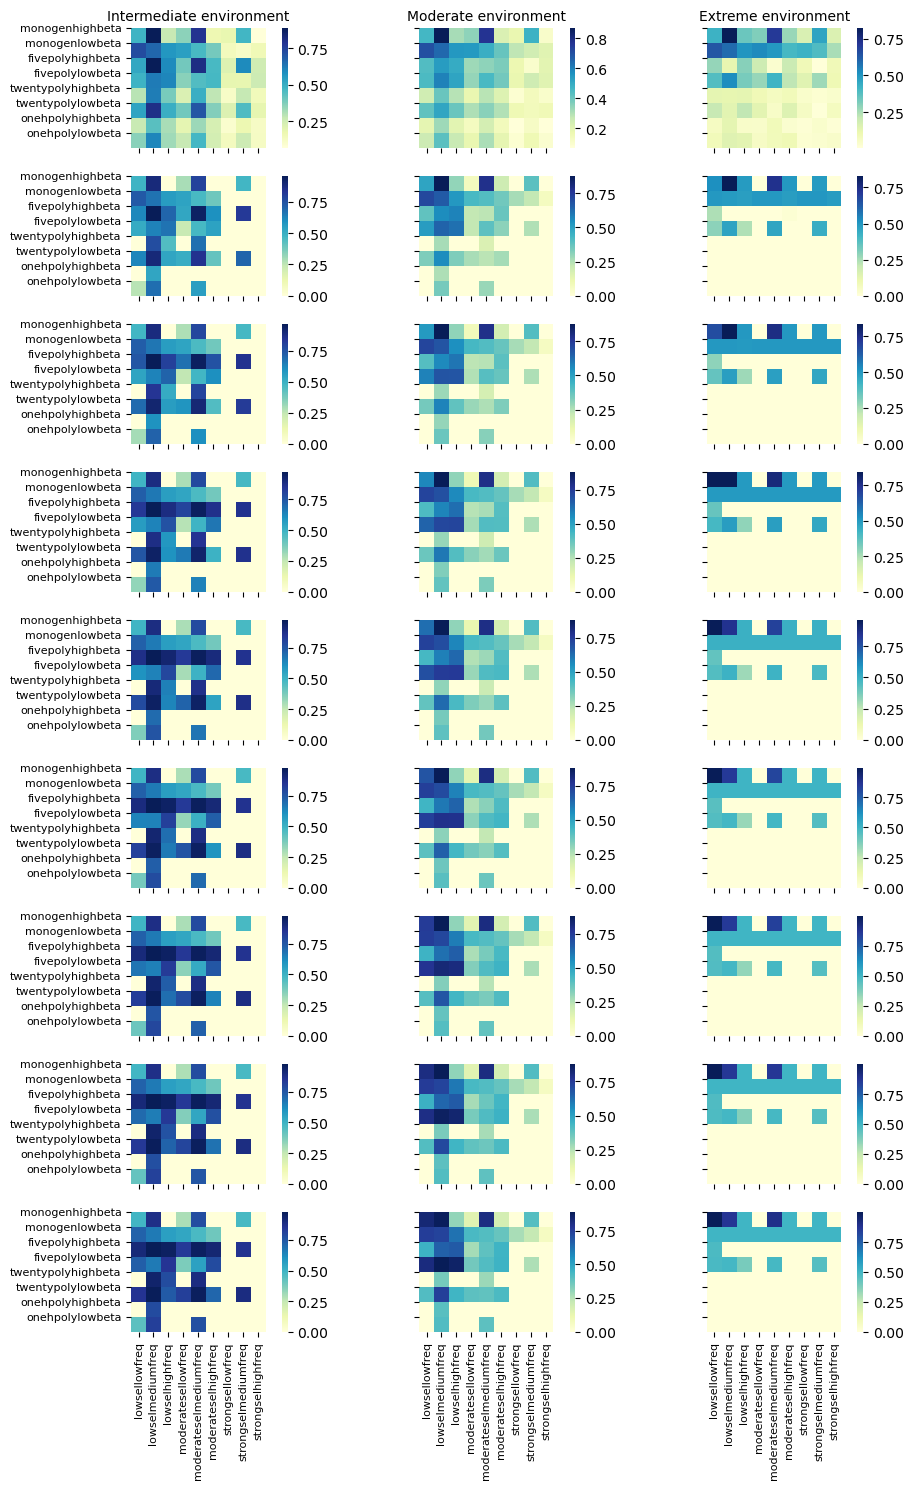

In [189]:

fig, axes = plt.subplots(9, 3)
plt.subplots_adjust(wspace=0.2, hspace=0.2) 
fig.set_figheight(15)
fig.set_figwidth(10)

for col_num in range(9):  # Loop through columns 0 to 5

    for pos, optima_value in enumerate(['int', 'me', 'ex']):

        mfitness_col = mfitness[['sel_freq', 'poly_beta', 'optima' , str(col_num)]].copy()
        filter1 = mfitness_col[mfitness_col['optima'] == optima_value]
        filter1 = create_pivot_rearrage(filter1, str(col_num))

        ax = sns.heatmap(filter1, annot=False, cmap='YlGnBu', fmt=".2f", ax=axes[col_num, pos],square=True)
        ax.set_ylabel('')
        
        ax.set_yticks(range(8))
  
        # set the labels
        ax.set_yticklabels(filter1.index.tolist())
        
            # Hide tick labels for all but the bottom subplot in each column
        if col_num < 8:
            ax.set_xticklabels([])
        if pos > 0:
            ax.set_yticklabels([])
        ax.tick_params(axis='both', labelsize=8)  # Set the font size to 10 (adjust as needed)
        
        if col_num == 0:
            if optima_value == 'int':
                ax.set_title('Intermediate environment', fontsize=10)  # Adjust title and font size as needed
            elif optima_value == 'me':
                ax.set_title('Moderate environment', fontsize=10)  # Adjust title and font size as needed
            elif optima_value == 'ex':
                ax.set_title('Extreme environment', fontsize=10)  # Adjust title and font size as needed

        

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [226]:
calcualte the cahngee!!! mfitness

In [192]:
for i in range(0, 8):
    mfitness[f'delta_mf{i}'] = mfitness[f'{i+1}'] - mfitness[f'{i}']

In [193]:
deltas = ['delta_mf0', 'delta_mf1','delta_mf2','delta_mf3','delta_mf4','delta_mf5','delta_mf6','delta_mf7']

In [194]:
global_vmin = mfitness[deltas].values.min()
global_vmax = mfitness[deltas].values.max()

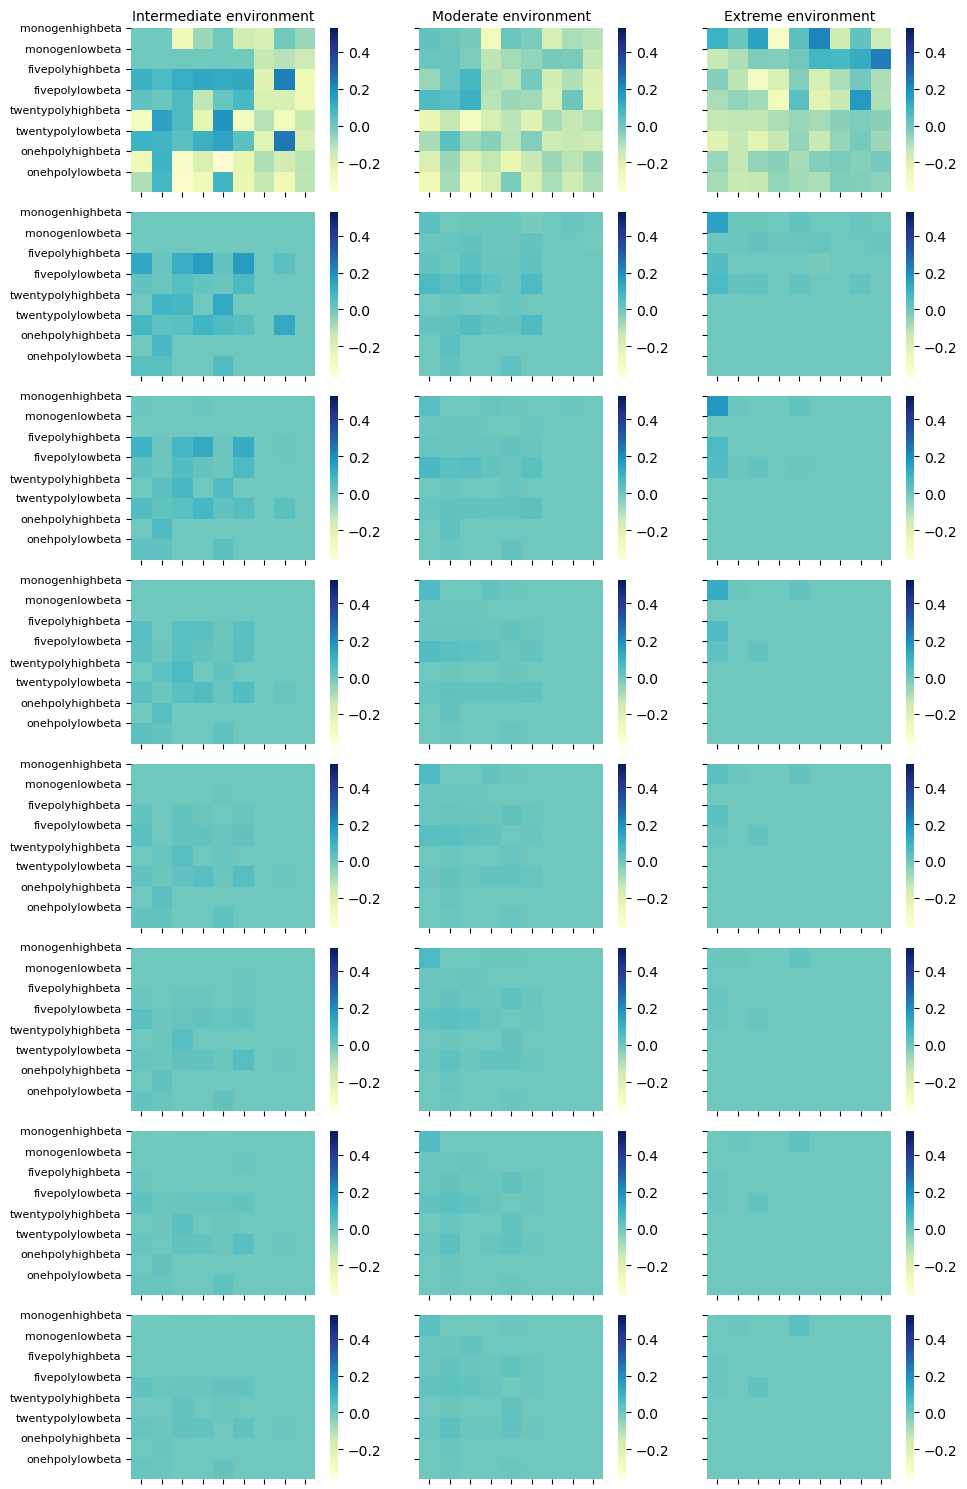

In [195]:
# Assuming mfitness is your DataFrame
# Create a 2x3 grid of subplots for heatmaps (2 rows and 3 columns for 6 subplots)
fig, axes = plt.subplots(8, 3)
plt.subplots_adjust(wspace=0.2, hspace=0.2) 
fig.set_figheight(15)
fig.set_figwidth(10)

for col_num,delta in enumerate(deltas):  # Loop through columns 0 to 5

    for pos, optima_value in enumerate(['int', 'me', 'ex']):

        mfitness_col = mfitness[['sel_freq', 'poly_beta', 'optima' , delta]].copy()
        filter1 = mfitness_col[mfitness_col['optima'] == optima_value]
        filter1 = create_pivot_rearrage(filter1, delta)

        ax = sns.heatmap(filter1, annot=False, cmap='YlGnBu', fmt=".2f", ax=axes[col_num, pos],square=True,
                        vmin=global_vmin, vmax=global_vmax)
        ax.set_ylabel('')
        
        ax.set_yticks(range(8))
  
        # set the labels
        ax.set_yticklabels(filter1.index.tolist())
        
            # Hide tick labels for all but the bottom subplot in each column
        if col_num < 8:
            ax.set_xticklabels([])
        if pos > 0:
            ax.set_yticklabels([])
        ax.tick_params(axis='both', labelsize=8)  # Set the font size to 10 (adjust as needed)
        
        if col_num == 0:
            if optima_value == 'int':
                ax.set_title('Intermediate environment', fontsize=10)  # Adjust title and font size as needed
            elif optima_value == 'me':
                ax.set_title('Moderate environment', fontsize=10)  # Adjust title and font size as needed
            elif optima_value == 'ex':
                ax.set_title('Extreme environment', fontsize=10)  # Adjust title and font size as needed

        

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

Decision tree

In [33]:
survival = pop_size[8].isna().replace({True: 1, False: 0})

In [34]:
survival.name = 'survival'

In [37]:
survival = survival.reset_index()

In [44]:
survival['optima'] = survival['index'].str.split('/').str[-1]

In [45]:
survival['sel'] = survival['index'].str.split('/').str[-2]

In [51]:
survival['freq'] = survival['index'].str.split('_').str[-3]

In [52]:
survival['poly'] = survival['index'].str.split('_').str[-2]

In [53]:
survival['beta'] = survival['index'].str.split('_').str[-1].str.split('/').str[0]

In [58]:
survival = survival.drop('index',axis=1)

In [59]:
## maybe is a good idea to replace optima by extreme, mod and intermediate? 

In [61]:
survival = survival.replace({'optima0': 2, 'optima1': 1, 'optima2': 0, 'optima3': 1, 'optima4': 2})

In [70]:
survival = survival.replace({'lowsel': 0, 'moderatesel': 1, 'strongsel': 2})

In [73]:
survival = survival.replace({'lowfreq': 0, 'mediumfreq': 1, 'highfreq': 2})

In [76]:
survival = survival.replace({'monogen': 1, 'fivepoly': 5, 'twentypoly': 20, 'onehpoly':100})

In [78]:
survival = survival.replace({'highbeta': 1, 'lowbeta': 0})

In [ ]:
sklearn.preprocessing.OneHotEncoder or pandas.get_dummies

In [79]:
survival

survival  optima  sel  freq  poly  beta
0           1       2    0     2     5     1
1           0       1    0     2     5     1
2           0       0    0     2     5     1
3           0       1    0     2     5     1
4           0       2    0     2     5     1
..        ...     ...  ...   ...   ...   ...
355         1       2    2     1    20     0
356         1       1    2     1    20     0
357         1       0    2     1    20     0
358         1       1    2     1    20     0
359         1       2    2     1    20     0

[360 rows x 6 columns]

In [92]:
X.columns

Index(['optima', 'sel', 'freq', 'poly', 'beta'], dtype='object')

In [80]:
X = survival.drop('survival',axis=1)

In [81]:
Y = survival['survival']

In [82]:
from sklearn import tree

In [86]:
clf = tree.DecisionTreeClassifier(max_depth=6)

In [87]:
clf = clf.fit(X, Y)

In [ ]:
tree.plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names)


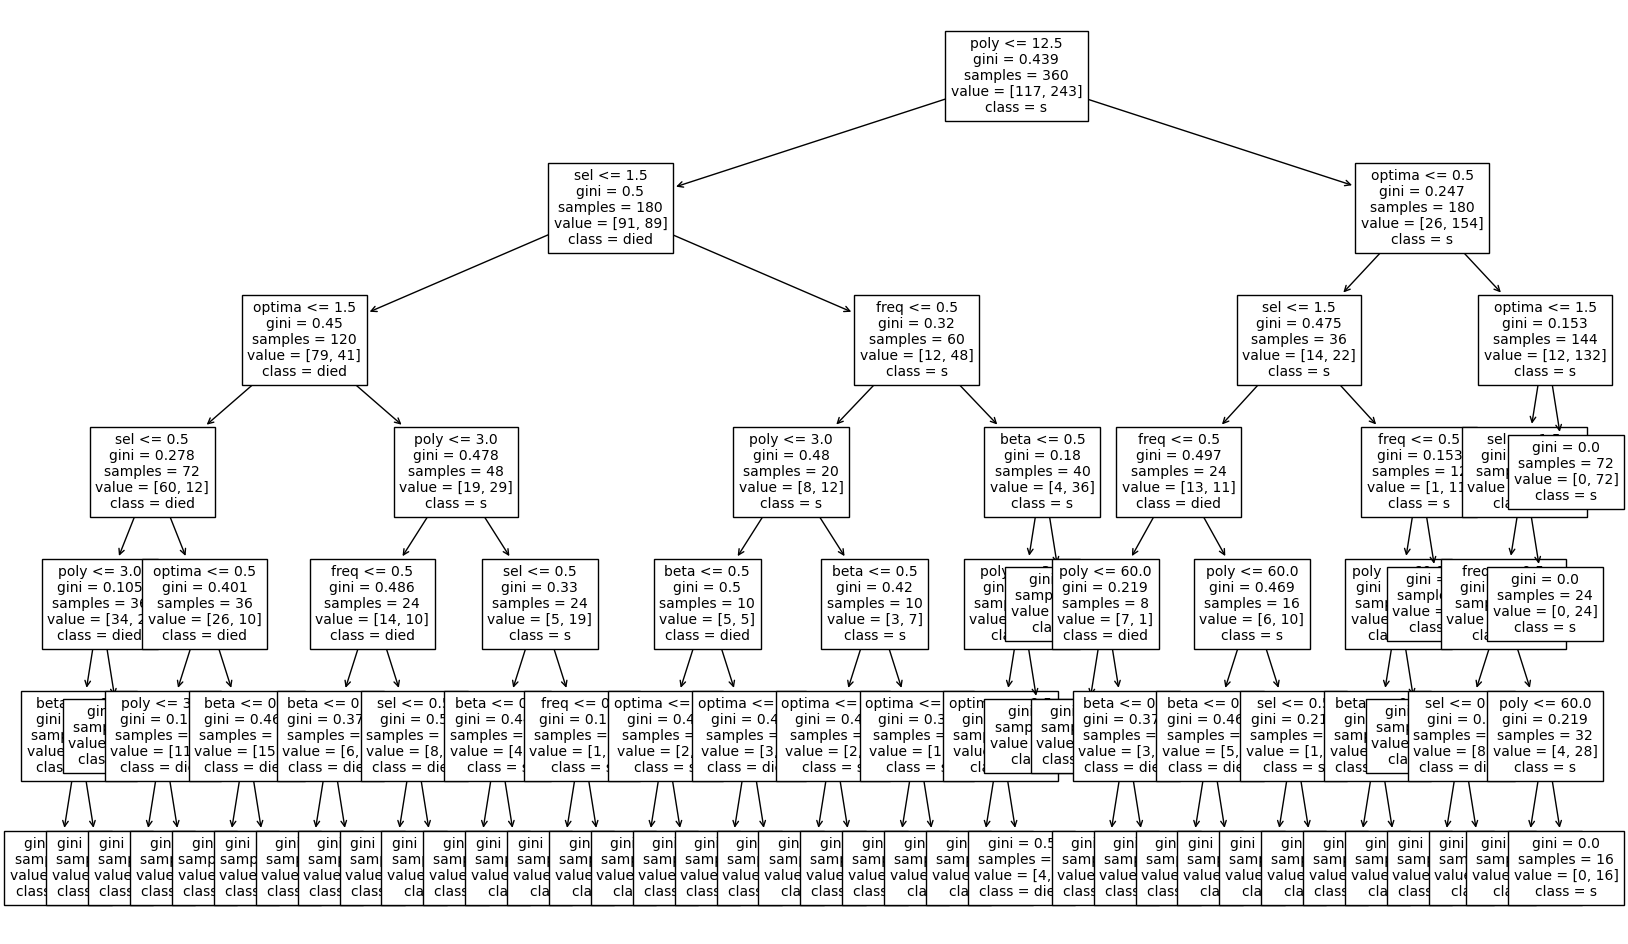

In [96]:

# plot tree
plt.figure(figsize=(20,12))  # set plot size (denoted in inches)
tree.plot_tree(clf, fontsize=10, feature_names = X.columns, class_names=['died', 's'])
plt.show()

[Text(0.6247282608695652, 0.95, 'x[3] <= 12.5\ngini = 0.439\nsamples = 360\nvalue = [117, 243]'),
 Text(0.4016304347826087, 0.85, 'x[1] <= 1.5\ngini = 0.5\nsamples = 180\nvalue = [91, 89]'),
 Text(0.21195652173913043, 0.75, 'x[0] <= 1.5\ngini = 0.45\nsamples = 120\nvalue = [79, 41]'),
 Text(0.06956521739130435, 0.65, 'x[1] <= 0.5\ngini = 0.278\nsamples = 72\nvalue = [60, 12]'),
 Text(0.02608695652173913, 0.55, 'x[3] <= 3.0\ngini = 0.105\nsamples = 36\nvalue = [34, 2]'),
 Text(0.017391304347826087, 0.45, 'x[4] <= 0.5\ngini = 0.198\nsamples = 18\nvalue = [16, 2]'),
 Text(0.008695652173913044, 0.35, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0.02608695652173913, 0.35, 'x[2] <= 0.5\ngini = 0.346\nsamples = 9\nvalue = [7, 2]'),
 Text(0.017391304347826087, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.034782608695652174, 0.25, 'x[2] <= 1.5\ngini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(0.02608695652173913, 0.15, 'x[0] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'

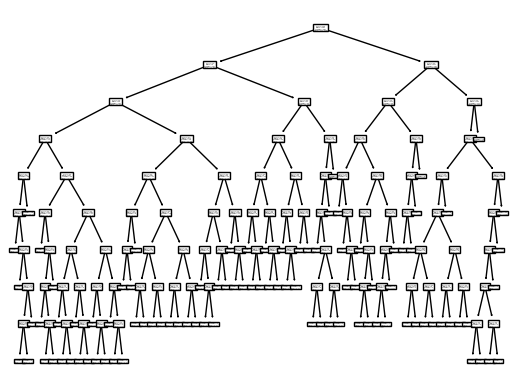

In [85]:
tree.plot_tree(clf);